In [111]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt, timedelta
import pandas as pd

In [64]:
T_INIT = dt(2023,8,18)
weekday = T_INIT.weekday()
dayoffset = (4-weekday)%7

mapLTs = set([(i,) for i in range(0,29,1)]+[(21,28)]+[(21+dayoffset,),(28+dayoffset,),(21+dayoffset,28+dayoffset)
    ])

In [70]:
print(mapLTs)
print(dayoffset)
type(mapLTs)
print([(21,28)])
print([(21+dayoffset,),(28+dayoffset,),(21+dayoffset,28+dayoffset)])
print([(i,) for i in range(0,29,1)])
print([(21,28)]+[(21,),(28,)])

{(2,), (5,), (11,), (8,), (14,), (21, 28), (17,), (23,), (20,), (26,), (4,), (1,), (7,), (10,), (16,), (13,), (19,), (25,), (22,), (28,), (0,), (3,), (9,), (6,), (12,), (18,), (15,), (21,), (24,), (27,)}
0
[(21, 28)]
[(21,), (28,), (21, 28)]
[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (16,), (17,), (18,), (19,), (20,), (21,), (22,), (23,), (24,), (25,), (26,), (27,), (28,)]
[(21, 28), (21,), (28,)]


In [141]:
# ds_r = xr.open_dataset('/data/ycheng/JRA/Data/2023_realtime/sst_2023.nc')
ds_new = xr.open_dataset('/home/ycheng/LIM/CPC/run_code/t2m.all.nc')
# ds_new['anomaly'].isel(time=223).plot()
print(ds_new['time'])

# complete_date_range = pd.date_range(start=dt(2020,9,15), end=dt(2023,8,12), freq='D')

# Find missing dates
# missing_dates = complete_date_range.difference(ds_new['time'])
# print(missing_dates)

<xarray.DataArray 'time' (time: 1057)>
array(['2020-09-15T00:00:00.000000000', '2020-09-16T00:00:00.000000000',
       '2020-09-17T00:00:00.000000000', ..., '2023-08-10T00:00:00.000000000',
       '2023-08-11T00:00:00.000000000', '2023-08-12T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-09-15 2020-09-16 ... 2023-08-12
Attributes:
    long_name:      Time
    delta_t:        0000-00-01 00:00:00
    standard_name:  time
    axis:           T


In [ ]:
# ds = xr.open_dataset('/data/ycheng/JRA/Data/2023/sst_2023.nc')
ds_old = xr.open_dataset('/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/10c_sliding_climo/T2m/T2m.2023.nc')
# ds_old['anomaly'].isel(time=224).plot()
ds_old['anomaly'].isel(time=223).plot()


FileNotFoundError: [Errno 2] No such file or directory: '/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/10c_sliding_climo/T2m/t2m.all.nc'

In [136]:
dstmp   = xr.open_dataset(f'data_realtime/surfAll.nc')
t0 = dt(2023,12,31)
ds_subset = dstmp.sel(time=slice(f'{t0.year -1 }-12-01', None))
    # dstmp.time.dt.year == dates)
ds_subset['time']
# print(dstmp['time'])
# print(dt(2023,8,12)-dt(2023,1,1))
# time_dt = dstmp['time'][:]
# time_dt.year
# dstmp   = dstmp.sel[time_dt.year==2023]

<xarray.DataArray 'time' (time: 255)>
array(['2022-12-01T00:00:00.000000000', '2022-12-02T00:00:00.000000000',
       '2022-12-03T00:00:00.000000000', ..., '2023-08-10T00:00:00.000000000',
       '2023-08-11T00:00:00.000000000', '2023-08-12T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time               (time) datetime64[ns] 2022-12-01 ... 2023-08-12
    meanSea            int64 ...
    step               timedelta64[ns] ...
    heightAboveGround  int64 ...
    number             int64 ...
    surface            int64 ...

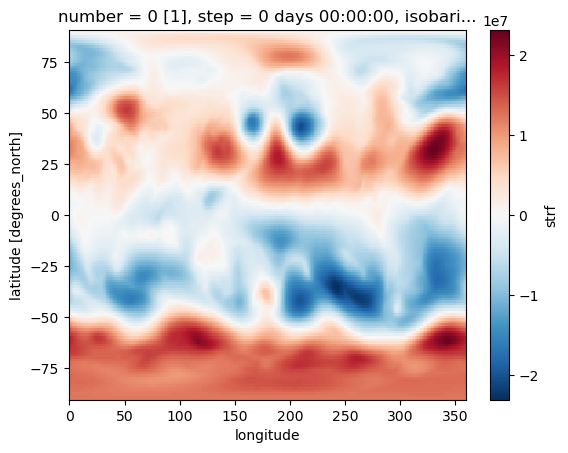

In [25]:
# ds
ds_r['strf'].isel(time=10,isobaricInhPa=1).plot()
# plt.show()
# diff = ds-ds_r
# diff['btmp'].isel(time=10).plot()

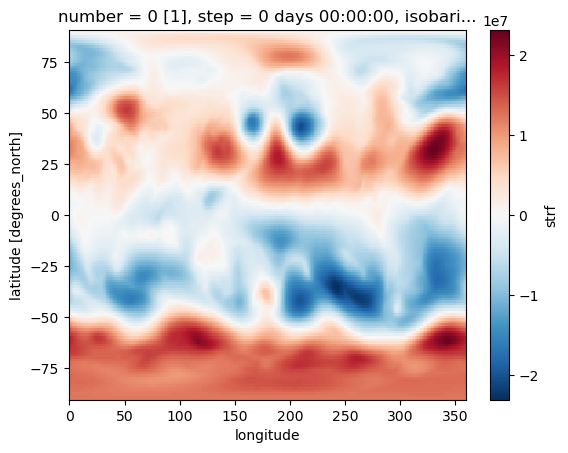

In [26]:
ds['strf'].isel(time=10,isobaricInhPa=1).plot()


In [50]:
cpcmask = xr.open_dataset('data_clim/cpcmask.nc')

(87, 179)
(89, 181)


array([-87., -85., -83., -81., -79., -77., -75., -73., -71., -69., -67.,
       -65., -63., -61., -59., -57., -55., -53., -51., -49., -47., -45.,
       -43., -41., -39., -37., -35., -33., -31., -29., -27., -25., -23.,
       -21., -19., -17., -15., -13., -11.,  -9.,  -7.,  -5.,  -3.,  -1.,
         1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,
        23.,  25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,
        45.,  47.,  49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,
        67.,  69.,  71.,  73.,  75.,  77.,  79.,  81.,  83.,  85.,  87.])

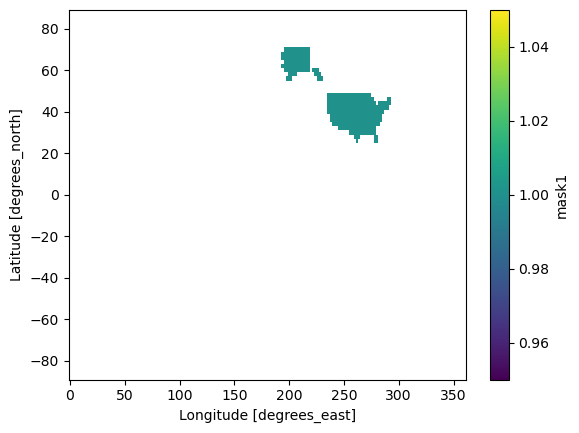

In [56]:
cpcmask['mask1'].plot()
# np.sum(~np.isnan(dsm['mask1']))
print(cpcmask['mask1'].data[1:-1,1:-1].shape)
print(cpcmask['mask1'].data.shape)
latbins = np.mean([cpcmask.lat.data[:-1],cpcmask.lat.data[1:]],axis=0)
[cpcmask.lat.data[:-1],cpcmask.lat.data[1:]]
latbins

In [93]:
# ds.total.plot(x='lon',y='lat')

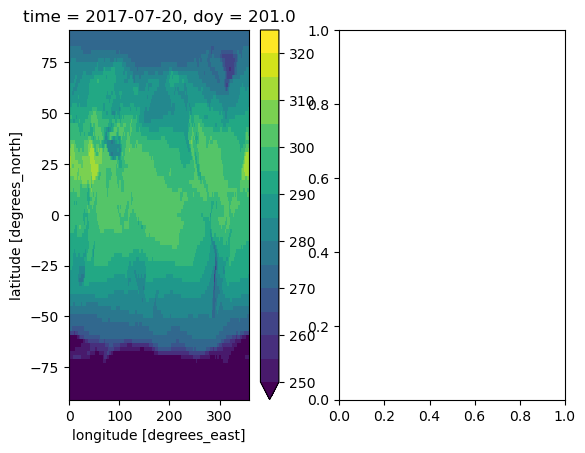

In [6]:
# plt.imshow(anom[100])
nt=200
total = anom[nt] + climo[nt]

custom_contour_levels = np.arange(250,330,5)

# Plot the temperature map using plt.contourf
# Assuming the latitude and longitude coordinates are named 'latitude' and 'longitude' respectively
fig, ax = plt.subplots(1,2)
# ax.contourf(ds['lon'], ds['lat'], total,
#              levels=custom_contour_levels, cmap='jet')

total.plot(ax=ax[0],levels=custom_contour_levels)
# ds.total.plot(ax=ax[0],levels=custom_contour_levels)
# t2m[nt].plot(ax=ax[1],levels=custom_contour_levels)
# ds.total.plot(x='lon',y='lat')
# ax[0].set_xlim(170, 300)
# ax[0].set_ylim(20, 70)
# ax[1].set_xlim(170, 300)
# ax[1].set_ylim(20, 70)



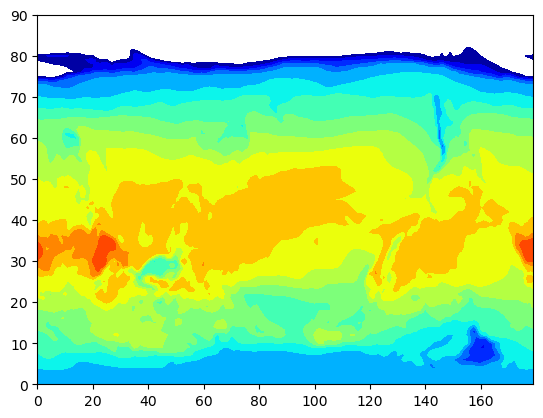

In [102]:
plt.contourf(total,
             levels=custom_contour_levels, cmap='jet')

In [54]:
ds1['longitude'][0:20]


<xarray.DataArray 'longitude' (longitude: 20)>
array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  , 11.25,
       12.5 , 13.75, 15.  , 16.25, 17.5 , 18.75, 20.  , 21.25, 22.5 , 23.75])
Coordinates:
    number             int64 ...
    step               timedelta64[ns] ...
    meanSea            float64 ...
  * longitude          (longitude) float64 0.0 1.25 2.5 ... 21.25 22.5 23.75
    heightAboveGround  float64 ...

In [32]:
variables={'lat':'a','lon':'b','time':'c','latitude':'d'}
lat_name = ([s for s in variables.keys() if s=='lat' or s=='latitude']+[None])[0]
# lat_name = ([s for s in variables.keys() if 'lat' in s])

In [33]:
print(lat_name)

lat


In [57]:
import numpy as np

# Create a masked array with a mask
data = np.array([1, 2, 3, 4, 5])
mask = np.array([False, True, False, False, True])
masked_data = np.ma.masked_array(data, mask)

# Convert the masked array to a regular NumPy array
regular_array = np.array(masked_data)
print(masked_data)
print(regular_array)

[1 -- 3 4 --]
[1 2 3 4 5]


In [58]:
import numpy as np

# Create a masked array with a mask
data = np.array([1, 2, 3, 4, 5])
mask = np.array([False, True, False, False, True])
masked_data = np.ma.masked_array(data, mask)

# Convert the masked array to a regular NumPy array
regular_array = np.asarray(masked_data)

print(regular_array)
# Output: [1 1 3 4 1]


[1 2 3 4 5]


In [72]:
perday = 1

newdata = np.arange(1,100,1)
print(newdata)
# newdata = np.apply_along_axis(lambda x: np.convolve(x,np.ones(perday)/perday, mode='valid')[::perday], axis=0, arr=newdata)
newdata = np.apply_along_axis(lambda x: np.convolve(x,np.ones(perday)/perday, mode='valid'), axis=0, arr=newdata)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


In [73]:
print(newdata)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 90.
 91. 92. 93. 94. 95. 96. 97. 98. 99.]


In [65]:
print(np.ones(perday)/perday)

[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]


In [ ]:
print(1+2+3+4+5+6+7)


28
